In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/paris-2024-olympic-summer-games/medallists.csv
/kaggle/input/paris-2024-olympic-summer-games/teams.csv
/kaggle/input/paris-2024-olympic-summer-games/torch_route.csv
/kaggle/input/paris-2024-olympic-summer-games/schedules.csv
/kaggle/input/paris-2024-olympic-summer-games/athletes.csv
/kaggle/input/paris-2024-olympic-summer-games/venues.csv
/kaggle/input/paris-2024-olympic-summer-games/schedules_preliminary.csv
/kaggle/input/paris-2024-olympic-summer-games/medals_total.csv
/kaggle/input/paris-2024-olympic-summer-games/events.csv
/kaggle/input/paris-2024-olympic-summer-games/medals.csv


The following analysis is on the data shared before the Games began. Analysis of games/winners has not yet been done.

## Step 1: Reading the relevant files

Currently, the complete analysis has been performed on `events.csv`


In [2]:
events = pd.read_csv('/kaggle/input/paris-2024-olympic-summer-games/events.csv')

In [3]:
events

,event,tag,sport,sport_code,sport_url
0,Men's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
1,Women's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
2,Men's Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
3,Women's Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
4,Mixed Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
...,...,...,...,...,...
324,Men's Freestyle 65kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...
325,Men's Freestyle 74kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...
326,Men's Freestyle 86kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...
327,Men's Freestyle 97kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...


## Step 2: Analysis 

First, to analyse the sports-wise breakdown of the events. 

Athletics and Swimming are the dominant sports in the olympics when looking at the diversity of events within the category, with 48 athletics events and 35 swimming events being conducted int he Paris Olympics. 

In [4]:
events['sport'].value_counts()

sport
Athletics                48
Swimming                 35
Wrestling                18
Judo                     15
Shooting                 15
Rowing                   14
Artistic Gymnastics      14
Boxing                   13
Fencing                  12
Cycling Track            12
Canoe Sprint             10
Sailing                  10
Weightlifting            10
Taekwondo                 8
Diving                    8
Canoe Slalom              6
Equestrian                6
Table Tennis              5
Tennis                    5
Archery                   5
Badminton                 5
Skateboarding             4
Sport Climbing            4
Cycling Road              4
Triathlon                 3
Artistic Swimming         2
Water Polo                2
Volleyball                2
Trampoline                2
Basketball                2
Basketball 3x3            2
Beach Volleyball          2
Surfing                   2
Football                  2
Golf                      2
Breaking      

A simple plot to showcase the above breakdown using matplotlib:

<Axes: xlabel='sport'>

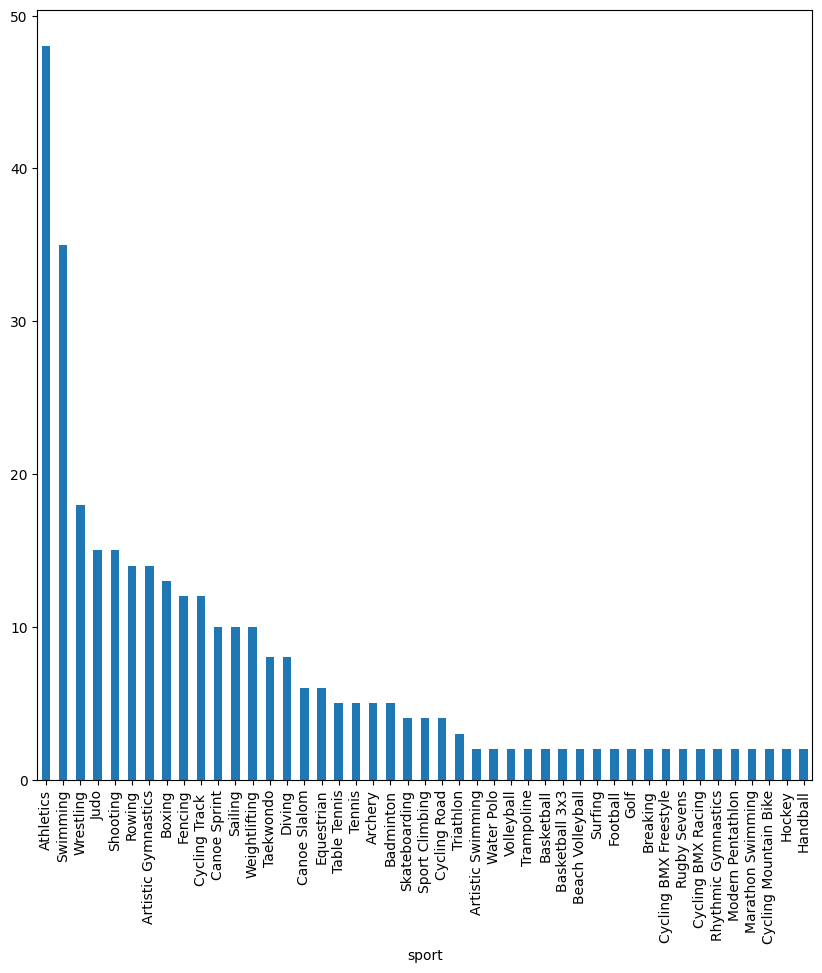

In [5]:
import matplotlib.pyplot as plt
events['sport'].value_counts().plot.bar(figsize=(10,10))

The next component that can be analysed is the number of sports categories with events for men/women and how the distribution of events varies with respect to sports and the sex of the athletes competing. 

The first step here is to assign a new column denoting the sex of athletes competing in the event (hereafter in code, referred to as gender). This has been done by checking the event names for terms such as 'women'/'girl' and 'men'/'boy' to ascertain the intended sex of athletes for that event.

In [6]:
gender_tf = []
for y in events['event'].apply(lambda x: x.lower()) :
    if 'women' in y or 'girl' in y:
        gender_tf.append('women')
    elif 'men' in y or 'boy' in y:
        gender_tf.append('men')
    else:
        gender_tf.append('mixed/non-gendered')
gender_tf = pd.Series(gender_tf)

In [7]:
events['gender'] = gender_tf

The events are grouped by sports first, and then by gender, and the number of events are counted using the following code

In [8]:
event_grouped = events.groupby(['sport', 'gender'])['event'].count()

In [9]:
event_grouped

sport                gender            
Archery              men                    2
                     mixed/non-gendered     1
                     women                  2
Artistic Gymnastics  men                    8
                     women                  6
                                           ..
Water Polo           women                  1
Weightlifting        men                    5
                     women                  5
Wrestling            men                   12
                     women                  6
Name: event, Length: 97, dtype: int64

Plotting the grouped data to gain a visual understanding of the events distribution helps us understand that with the exception of a few events, most categories have an equal number of opportunities for men/women

<Axes: xlabel='sport'>

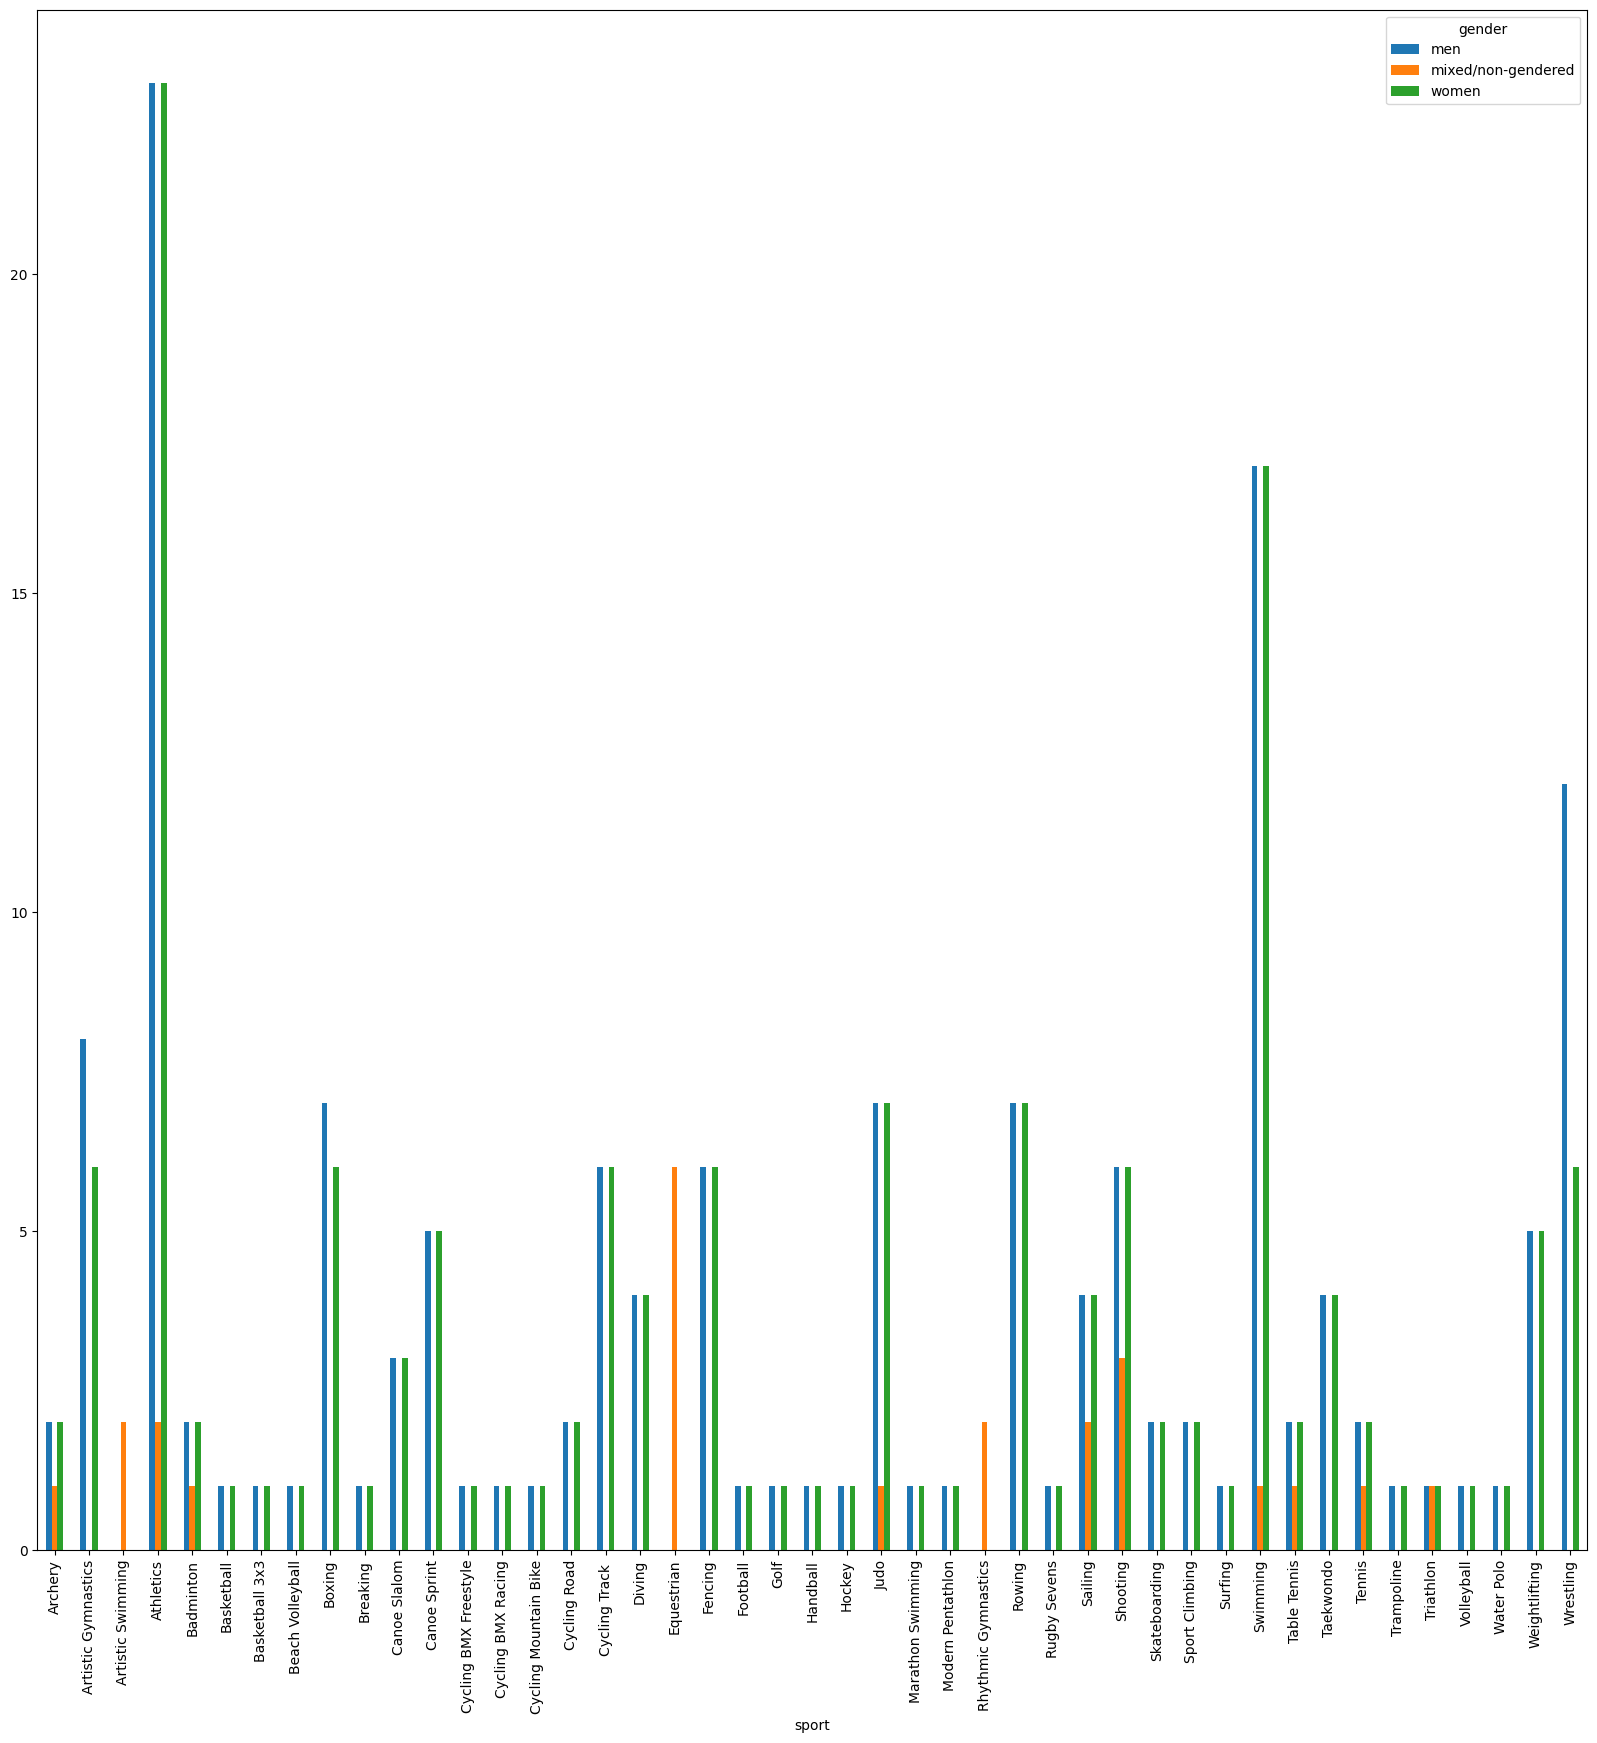

In [10]:
event_grouped.unstack().plot(kind='bar', figsize=(20,20))

Men and Women have roughly the same number of events for each sport, with the exception of Artistic Gymnastics, Boxing and Wrestling

Looking into wrestling, men and women both have 6 weight classes for freestyle wrestling, and men also have 6 additional events for 'Greco-Roman' style wrestling. 

From the Paris Olympics website, the following difference is given regarding these different styles:
> The main difference between these two wrestling styles lies in the grappling holds that are allowed. While Greco-Roman wrestlers must only hold their opponents above the waist, in Freestyle wrestling it is possible to attack any part of the body and to use one's own legs (or an arm) to execute holds on a rival's legs.

In [11]:
events[(events['sport']=='Wrestling')&(events['gender']=='men')]

,event,tag,sport,sport_code,sport_url,gender
311,Men's Greco-Roman 60kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,men
312,Men's Greco-Roman 67kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,men
313,Men's Greco-Roman 77kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,men
314,Men's Greco-Roman 87kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,men
315,Men's Greco-Roman 97kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,men
316,Men's Greco-Roman 130kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,men
323,Men's Freestyle 57kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,men
324,Men's Freestyle 65kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,men
325,Men's Freestyle 74kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,men
326,Men's Freestyle 86kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,men


In [12]:
events[(events['sport']=='Wrestling')&(events['gender']=='women')]

,event,tag,sport,sport_code,sport_url,gender
317,Women's Freestyle 50kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,women
318,Women's Freestyle 53kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,women
319,Women's Freestyle 57kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,women
320,Women's Freestyle 62kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,women
321,Women's Freestyle 68kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,women
322,Women's Freestyle 76kg,wrestling,Wrestling,WRE,https://olympics.com/en/paris-2024/sports/wres...,women


Artistic Gymnastics has a lot more variation for the different events for men and women.

The common events include: All-Around, Floor Exercise, Vault and Team

The distinct events include:

1. For men:
* Men's Pommel Horse
* Men's Rings
* Men's Parallel Bars
* Men's Horizontal Bar

2. For women:
* Women's Uneven Bars
* Women's Balance Beam

In [13]:
events[(events['sport']=='Artistic Gymnastics')&(events['gender']=='men')]

,event,tag,sport,sport_code,sport_url,gender
5,Men's All-Around,artistic-gymnastics,Artistic Gymnastics,GAR,https://olympics.com/en/paris-2024/sports/arti...,men
6,Men's Floor Exercise,artistic-gymnastics,Artistic Gymnastics,GAR,https://olympics.com/en/paris-2024/sports/arti...,men
7,Men's Pommel Horse,artistic-gymnastics,Artistic Gymnastics,GAR,https://olympics.com/en/paris-2024/sports/arti...,men
8,Men's Rings,artistic-gymnastics,Artistic Gymnastics,GAR,https://olympics.com/en/paris-2024/sports/arti...,men
9,Men's Vault,artistic-gymnastics,Artistic Gymnastics,GAR,https://olympics.com/en/paris-2024/sports/arti...,men
10,Men's Parallel Bars,artistic-gymnastics,Artistic Gymnastics,GAR,https://olympics.com/en/paris-2024/sports/arti...,men
11,Men's Horizontal Bar,artistic-gymnastics,Artistic Gymnastics,GAR,https://olympics.com/en/paris-2024/sports/arti...,men
12,Men's Team,artistic-gymnastics,Artistic Gymnastics,GAR,https://olympics.com/en/paris-2024/sports/arti...,men


In [14]:
events[(events['sport']=='Artistic Gymnastics')&(events['gender']=='women')]

,event,tag,sport,sport_code,sport_url,gender
13,Women's All-Around,artistic-gymnastics,Artistic Gymnastics,GAR,https://olympics.com/en/paris-2024/sports/arti...,women
14,Women's Vault,artistic-gymnastics,Artistic Gymnastics,GAR,https://olympics.com/en/paris-2024/sports/arti...,women
15,Women's Uneven Bars,artistic-gymnastics,Artistic Gymnastics,GAR,https://olympics.com/en/paris-2024/sports/arti...,women
16,Women's Balance Beam,artistic-gymnastics,Artistic Gymnastics,GAR,https://olympics.com/en/paris-2024/sports/arti...,women
17,Women's Floor Exercise,artistic-gymnastics,Artistic Gymnastics,GAR,https://olympics.com/en/paris-2024/sports/arti...,women
18,Women's Team,artistic-gymnastics,Artistic Gymnastics,GAR,https://olympics.com/en/paris-2024/sports/arti...,women


For Boxing, the primary difference is in the weight classes and number of classes, with women having 6 and men having 8

In [15]:
events[(events['sport']=='Boxing')&(events['gender']=='men')]

,event,tag,sport,sport_code,sport_url,gender
80,Men's 51kg,boxing,Boxing,BOX,https://olympics.com/en/paris-2024/sports/boxing,men
81,Men's 57kg,boxing,Boxing,BOX,https://olympics.com/en/paris-2024/sports/boxing,men
82,Men's 63.5kg,boxing,Boxing,BOX,https://olympics.com/en/paris-2024/sports/boxing,men
83,Men's 71kg,boxing,Boxing,BOX,https://olympics.com/en/paris-2024/sports/boxing,men
84,Men's 80kg,boxing,Boxing,BOX,https://olympics.com/en/paris-2024/sports/boxing,men
85,Men's 92kg,boxing,Boxing,BOX,https://olympics.com/en/paris-2024/sports/boxing,men
86,Men's +92kg,boxing,Boxing,BOX,https://olympics.com/en/paris-2024/sports/boxing,men


In [16]:
events[(events['sport']=='Boxing')&(events['gender']=='women')]

,event,tag,sport,sport_code,sport_url,gender
87,Women's 50kg,boxing,Boxing,BOX,https://olympics.com/en/paris-2024/sports/boxing,women
88,Women's 54kg,boxing,Boxing,BOX,https://olympics.com/en/paris-2024/sports/boxing,women
89,Women's 57kg,boxing,Boxing,BOX,https://olympics.com/en/paris-2024/sports/boxing,women
90,Women's 60kg,boxing,Boxing,BOX,https://olympics.com/en/paris-2024/sports/boxing,women
91,Women's 66kg,boxing,Boxing,BOX,https://olympics.com/en/paris-2024/sports/boxing,women
92,Women's 75kg,boxing,Boxing,BOX,https://olympics.com/en/paris-2024/sports/boxing,women


To explore weight classes in further detail, let's see which sports have different events based on weight classes.

These events are isolated by searching for the 'kg' keyword in the event name

In [17]:
sports_with_weightclasses = events[events['event'].apply(lambda x: 'kg' in x)]['sport'].unique()

In [18]:
sports_with_weightclasses

array(['Boxing', 'Judo', 'Taekwondo', 'Weightlifting', 'Wrestling'],
      dtype=object)

In [19]:
weight_df = events[events['sport'].isin(sports_with_weightclasses)].set_index(['sport', 'gender'])[['event']]

This function is utilised to isolated the weight class of the event from the string containing the event name.

In [20]:
def get_num_from_string(s):
    x = ""
    for i in s:
        if i.isdigit() or i=='.': x+=i
    return float(x) if x else None

In [21]:
weight_df

event
sport     gender                       
Boxing    men                Men's 51kg
          men                Men's 57kg
          men              Men's 63.5kg
          men                Men's 71kg
          men                Men's 80kg
...                                 ...
Wrestling men      Men's Freestyle 65kg
          men      Men's Freestyle 74kg
          men      Men's Freestyle 86kg
          men      Men's Freestyle 97kg
          men     Men's Freestyle 125kg

[64 rows x 1 columns]

In [22]:
weight_df['weight'] = weight_df['event'].apply(get_num_from_string)

In [23]:
weight_df[weight_df['weight'].isna()]

,,event,weight
sport,gender,,
Judo,mixed/non-gendered,Mixed Team,NaN


The above issue with a NaN value comes up, because in the initial screening, only the name of the categories with weights/numbers in them were chosen, so Judo, wherein most of the events have a weight class was also selected, however, one of the events, the Mixed Team has no weight class to report, as seen below:

In [24]:
events[(events['sport']=='Judo')]

,event,tag,sport,sport_code,sport_url,gender
167,Women -48 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,women
168,Women -52 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,women
169,Women -57 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,women
170,Women -63 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,women
171,Women -70 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,women
172,Women -78 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,women
173,Women +78 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,women
174,Men -60 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,men
175,Men -66 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,men
176,Men -73 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,men


To clean up, we drop the null values.

In [25]:
weight_df = weight_df.dropna()

In [26]:
weight_df

event  weight
sport     gender                               
Boxing    men                Men's 51kg    51.0
          men                Men's 57kg    57.0
          men              Men's 63.5kg    63.5
          men                Men's 71kg    71.0
          men                Men's 80kg    80.0
...                                 ...     ...
Wrestling men      Men's Freestyle 65kg    65.0
          men      Men's Freestyle 74kg    74.0
          men      Men's Freestyle 86kg    86.0
          men      Men's Freestyle 97kg    97.0
          men     Men's Freestyle 125kg   125.0

[63 rows x 2 columns]

In [27]:
weight_df[weight_df['weight'].isna()]

,,event,weight
sport,gender,,


In [28]:
weight_df_display = weight_df[['weight']]

In [29]:
weight_df_display

weight
sport     gender        
Boxing    men       51.0
          men       57.0
          men       63.5
          men       71.0
          men       80.0
...                  ...
Wrestling men       65.0
          men       74.0
          men       86.0
          men       97.0
          men      125.0

[63 rows x 1 columns]

In [30]:
weight_df_display.loc[weight_df_display.index.unique()[0]]

/tmp/ipykernel_18/1409736774.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  weight_df_display.loc[weight_df_display.index.unique()[0]]


weight
sport  gender        
Boxing men       51.0
       men       57.0
       men       63.5
       men       71.0
       men       80.0
       men       92.0
       men       92.0

The idea for the next visualisation is to track the differences in the weight classes between men/women for the same sports. The unqiue indices of the a multiIndex grouped dataframe are extracted, wherein the indices are the sports/gender and teh value is the weight class. 

The following plots explore the above relation.

In [31]:
weight_df_display.index.unique()

MultiIndex([(       'Boxing',   'men'),
            (       'Boxing', 'women'),
            (         'Judo', 'women'),
            (         'Judo',   'men'),
            (    'Taekwondo',   'men'),
            (    'Taekwondo', 'women'),
            ('Weightlifting', 'women'),
            ('Weightlifting',   'men'),
            (    'Wrestling',   'men'),
            (    'Wrestling', 'women')],
           names=['sport', 'gender'])

/tmp/ipykernel_18/1863759612.py:11: PerformanceWarning: indexing past lexsort depth may impact performance.
  values = weight_df_display.loc[(unique_sport, gender)].values.flatten()


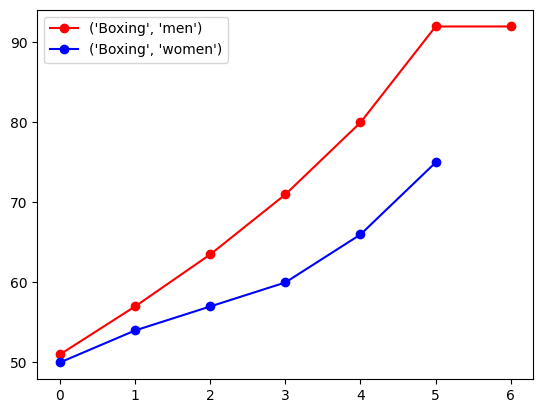

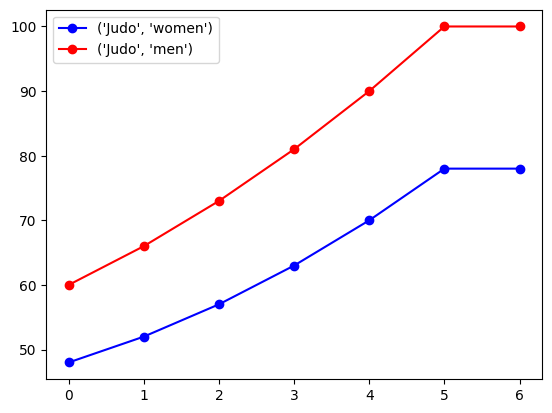

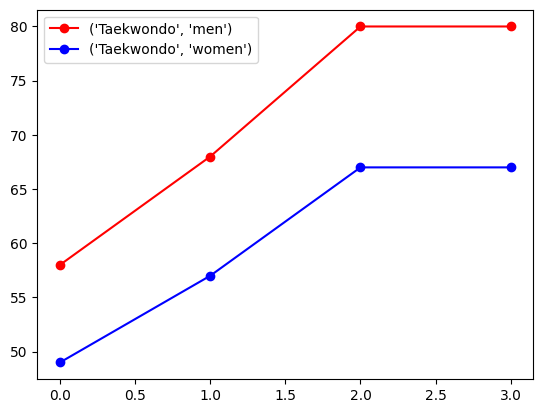

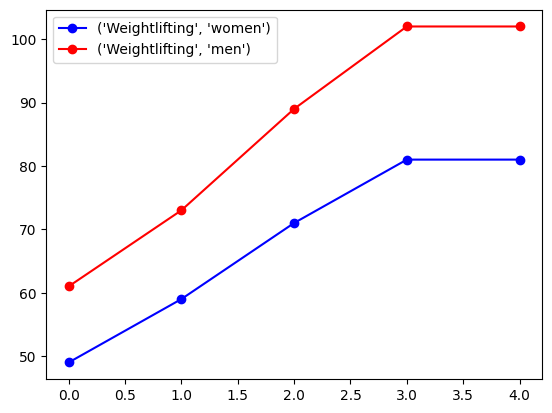

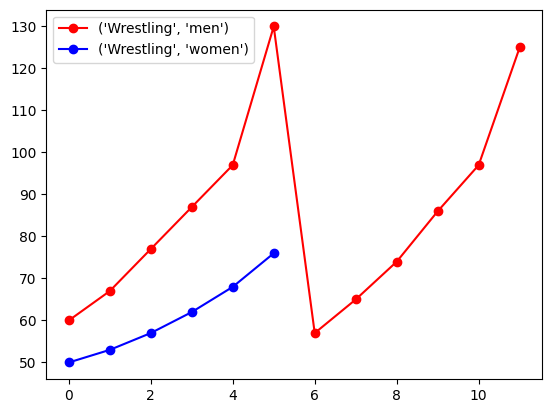

In [32]:
fig, ax = plt.subplots()
color_map = {
    'men': 'red',
    'women': 'blue'
}
unique_indices = weight_df_display.index.unique()
curr_sport = unique_indices[0][0]
curr_sport_count = 0

for unique_sport, gender in unique_indices:
    values = weight_df_display.loc[(unique_sport, gender)].values.flatten()
    if unique_sport != curr_sport:
        fig, ax = plt.subplots()
        curr_sport = unique_sport
        curr_sport_count = 0
    ax.plot(range(len(values)),
            values,
            label = (unique_sport, gender),
            marker = 'o',
            color = color_map[gender],
            linestyle = '-')
    ax.legend(frameon = True)
    curr_sport_count += 1
    
    if curr_sport_count == 2:
        plt.show()

There is a consistent pattern in all the graphs, with the women's weight class being lower than men's but both following a progression. 

2 things to notes here are: 
1. The plateau at the end of each graph is due to the fact that the last category is denoted as `+(last_weight_class)kg`, however, the numerical value is only that of the `last_weight_class` which causes two data points on the graph
2. For wrestling, as explored above, the men have two different styles, which causes the dip and rise seen in the graph.

The next idea is just a brief look at sports where there are no genderedevents, i.e. Rhythmic Gymnastics, Equestrian and Artistic Swimming.

In [33]:
events[events['sport']=='Rhythmic Gymnastics']

,event,tag,sport,sport_code,sport_url,gender
186,Individual All-Around,rhythmic-gymnastics,Rhythmic Gymnastics,GRY,https://olympics.com/en/paris-2024/sports/rhyt...,mixed/non-gendered
187,Group All-Around,rhythmic-gymnastics,Rhythmic Gymnastics,GRY,https://olympics.com/en/paris-2024/sports/rhyt...,mixed/non-gendered


In [34]:
events[events['sport']=='Equestrian']

,event,tag,sport,sport_code,sport_url,gender
141,Eventing Team,equestrian,Equestrian,EQU,https://olympics.com/en/paris-2024/sports/eque...,mixed/non-gendered
142,Eventing Individual,equestrian,Equestrian,EQU,https://olympics.com/en/paris-2024/sports/eque...,mixed/non-gendered
143,Dressage Team,equestrian,Equestrian,EQU,https://olympics.com/en/paris-2024/sports/eque...,mixed/non-gendered
144,Dressage Individual,equestrian,Equestrian,EQU,https://olympics.com/en/paris-2024/sports/eque...,mixed/non-gendered
145,Jumping Team,equestrian,Equestrian,EQU,https://olympics.com/en/paris-2024/sports/eque...,mixed/non-gendered
146,Jumping Individual,equestrian,Equestrian,EQU,https://olympics.com/en/paris-2024/sports/eque...,mixed/non-gendered


In [35]:
events[events['sport']=='Artistic Swimming']

,event,tag,sport,sport_code,sport_url,gender
19,Duet,artistic-swimming,Artistic Swimming,SWA,https://olympics.com/en/paris-2024/sports/arti...,mixed/non-gendered
20,Team,artistic-swimming,Artistic Swimming,SWA,https://olympics.com/en/paris-2024/sports/arti...,mixed/non-gendered


Finally, to explore the events with both men/women and mixed events:
Archery, Athletics, Badminton, Judo, Sailing, Shooting, Swimming, Table Tennis, Tennis, Triathlon

In order to both ensure that the categorization is correct, and to just take a look at the events, the dataframes are displayed

In general, the only significant observation is that it's mostly relays and team events that are mixed/non-gendered. 

In [36]:
multi_events = [
    'Archery', 
    'Athletics', 
    'Badminton', 
    'Judo', 
    'Sailing', 
    'Shooting', 
    'Swimming', 
    'Table Tennis', 
    'Tennis', 
    'Triathlon'
]

In [37]:
for event in multi_events:
    display(events[(events['sport']==event)])
    display(events[(events['sport']==event) & (events['gender']=='mixed/non-gendered')])
    print('-'*100)

,event,tag,sport,sport_code,sport_url,gender
0,Men's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery,men
1,Women's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery,women
2,Men's Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery,men
3,Women's Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery,women
4,Mixed Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery,mixed/non-gendered


,event,tag,sport,sport_code,sport_url,gender
4,Mixed Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery,mixed/non-gendered


----------------------------------------------------------------------------------------------------


,event,tag,sport,sport_code,sport_url,gender
21,Men's 100m,athletics,Athletics,ATH,https://olympics.com/en/paris-2024/sports/athl...,men
22,Men's 200m,athletics,Athletics,ATH,https://olympics.com/en/paris-2024/sports/athl...,men
23,Men's 400m,athletics,Athletics,ATH,https://olympics.com/en/paris-2024/sports/athl...,men
24,Men's 800m,athletics,Athletics,ATH,https://olympics.com/en/paris-2024/sports/athl...,men
25,Men's 1500m,athletics,Athletics,ATH,https://olympics.com/en/paris-2024/sports/athl...,men
26,Men's 5000m,athletics,Athletics,ATH,https://olympics.com/en/paris-2024/sports/athl...,men
27,"Men's 10,000m",athletics,Athletics,ATH,https://olympics.com/en/paris-2024/sports/athl...,men
28,Men's Marathon,athletics,Athletics,ATH,https://olympics.com/en/paris-2024/sports/athl...,men
29,Men's 3000m Steeplechase,athletics,Athletics,ATH,https://olympics.com/en/paris-2024/sports/athl...,men
30,Men's 110m Hurdles,athletics,Athletics,ATH,https://olympics.com/en/paris-2024/sports/athl...,men


,event,tag,sport,sport_code,sport_url,gender
67,4 x 400m Relay Mixed,athletics,Athletics,ATH,https://olympics.com/en/paris-2024/sports/athl...,mixed/non-gendered
68,Marathon Race Walk Mixed Relay,athletics,Athletics,ATH,https://olympics.com/en/paris-2024/sports/athl...,mixed/non-gendered


----------------------------------------------------------------------------------------------------


,event,tag,sport,sport_code,sport_url,gender
69,Men's Singles,badminton,Badminton,BDM,https://olympics.com/en/paris-2024/sports/badm...,men
70,Women's Singles,badminton,Badminton,BDM,https://olympics.com/en/paris-2024/sports/badm...,women
71,Men's Doubles,badminton,Badminton,BDM,https://olympics.com/en/paris-2024/sports/badm...,men
72,Women's Doubles,badminton,Badminton,BDM,https://olympics.com/en/paris-2024/sports/badm...,women
73,Mixed Doubles,badminton,Badminton,BDM,https://olympics.com/en/paris-2024/sports/badm...,mixed/non-gendered


,event,tag,sport,sport_code,sport_url,gender
73,Mixed Doubles,badminton,Badminton,BDM,https://olympics.com/en/paris-2024/sports/badm...,mixed/non-gendered


----------------------------------------------------------------------------------------------------


,event,tag,sport,sport_code,sport_url,gender
167,Women -48 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,women
168,Women -52 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,women
169,Women -57 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,women
170,Women -63 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,women
171,Women -70 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,women
172,Women -78 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,women
173,Women +78 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,women
174,Men -60 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,men
175,Men -66 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,men
176,Men -73 kg,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,men


,event,tag,sport,sport_code,sport_url,gender
181,Mixed Team,judo,Judo,JUD,https://olympics.com/en/paris-2024/sports/judo,mixed/non-gendered


----------------------------------------------------------------------------------------------------


,event,tag,sport,sport_code,sport_url,gender
204,Men's Windsurfing,sailing,Sailing,SAL,https://olympics.com/en/paris-2024/sports/sailing,men
205,Men's Kite,sailing,Sailing,SAL,https://olympics.com/en/paris-2024/sports/sailing,men
206,Men's Dinghy,sailing,Sailing,SAL,https://olympics.com/en/paris-2024/sports/sailing,men
207,Men's Skiff,sailing,Sailing,SAL,https://olympics.com/en/paris-2024/sports/sailing,men
208,Women's Windsurfing,sailing,Sailing,SAL,https://olympics.com/en/paris-2024/sports/sailing,women
209,Women's Kite,sailing,Sailing,SAL,https://olympics.com/en/paris-2024/sports/sailing,women
210,Women's Dinghy,sailing,Sailing,SAL,https://olympics.com/en/paris-2024/sports/sailing,women
211,Women's Skiff,sailing,Sailing,SAL,https://olympics.com/en/paris-2024/sports/sailing,women
212,Mixed Dinghy,sailing,Sailing,SAL,https://olympics.com/en/paris-2024/sports/sailing,mixed/non-gendered
213,Mixed Multihull,sailing,Sailing,SAL,https://olympics.com/en/paris-2024/sports/sailing,mixed/non-gendered


,event,tag,sport,sport_code,sport_url,gender
212,Mixed Dinghy,sailing,Sailing,SAL,https://olympics.com/en/paris-2024/sports/sailing,mixed/non-gendered
213,Mixed Multihull,sailing,Sailing,SAL,https://olympics.com/en/paris-2024/sports/sailing,mixed/non-gendered


----------------------------------------------------------------------------------------------------


,event,tag,sport,sport_code,sport_url,gender
214,10m Air Rifle Men,shooting,Shooting,SHO,https://olympics.com/en/paris-2024/sports/shoo...,men
215,50m Rifle 3 Positions Men,shooting,Shooting,SHO,https://olympics.com/en/paris-2024/sports/shoo...,men
216,10m Air Pistol Men,shooting,Shooting,SHO,https://olympics.com/en/paris-2024/sports/shoo...,men
217,25m Rapid Fire Pistol Men,shooting,Shooting,SHO,https://olympics.com/en/paris-2024/sports/shoo...,men
218,Trap Men,shooting,Shooting,SHO,https://olympics.com/en/paris-2024/sports/shoo...,men
219,Skeet Men,shooting,Shooting,SHO,https://olympics.com/en/paris-2024/sports/shoo...,men
220,10m Air Rifle Women,shooting,Shooting,SHO,https://olympics.com/en/paris-2024/sports/shoo...,women
221,50m Rifle 3 Positions Women,shooting,Shooting,SHO,https://olympics.com/en/paris-2024/sports/shoo...,women
222,10m Air Pistol Women,shooting,Shooting,SHO,https://olympics.com/en/paris-2024/sports/shoo...,women
223,25m Pistol Women,shooting,Shooting,SHO,https://olympics.com/en/paris-2024/sports/shoo...,women


,event,tag,sport,sport_code,sport_url,gender
226,10m Air Rifle Mixed Team,shooting,Shooting,SHO,https://olympics.com/en/paris-2024/sports/shoo...,mixed/non-gendered
227,10m Air Pistol Mixed Team,shooting,Shooting,SHO,https://olympics.com/en/paris-2024/sports/shoo...,mixed/non-gendered
228,Skeet Mixed Team,shooting,Shooting,SHO,https://olympics.com/en/paris-2024/sports/shoo...,mixed/non-gendered


----------------------------------------------------------------------------------------------------


,event,tag,sport,sport_code,sport_url,gender
239,Women's 50m Freestyle,swimming,Swimming,SWM,https://olympics.com/en/paris-2024/sports/swim...,women
240,Women's 100m Freestyle,swimming,Swimming,SWM,https://olympics.com/en/paris-2024/sports/swim...,women
241,Women's 200m Freestyle,swimming,Swimming,SWM,https://olympics.com/en/paris-2024/sports/swim...,women
242,Women's 400m Freestyle,swimming,Swimming,SWM,https://olympics.com/en/paris-2024/sports/swim...,women
243,Women's 800m Freestyle,swimming,Swimming,SWM,https://olympics.com/en/paris-2024/sports/swim...,women
244,Women's 1500m Freestyle,swimming,Swimming,SWM,https://olympics.com/en/paris-2024/sports/swim...,women
245,Women's 100m Backstroke,swimming,Swimming,SWM,https://olympics.com/en/paris-2024/sports/swim...,women
246,Women's 200m Backstroke,swimming,Swimming,SWM,https://olympics.com/en/paris-2024/sports/swim...,women
247,Women's 100m Breaststroke,swimming,Swimming,SWM,https://olympics.com/en/paris-2024/sports/swim...,women
248,Women's 200m Breaststroke,swimming,Swimming,SWM,https://olympics.com/en/paris-2024/sports/swim...,women


,event,tag,sport,sport_code,sport_url,gender
273,Mixed 4 x 100m Medley Relay,swimming,Swimming,SWM,https://olympics.com/en/paris-2024/sports/swim...,mixed/non-gendered


----------------------------------------------------------------------------------------------------


,event,tag,sport,sport_code,sport_url,gender
274,Men's Singles,table-tennis,Table Tennis,TTE,https://olympics.com/en/paris-2024/sports/tabl...,men
275,Women's Singles,table-tennis,Table Tennis,TTE,https://olympics.com/en/paris-2024/sports/tabl...,women
276,Mixed Doubles,table-tennis,Table Tennis,TTE,https://olympics.com/en/paris-2024/sports/tabl...,mixed/non-gendered
277,Men's Team,table-tennis,Table Tennis,TTE,https://olympics.com/en/paris-2024/sports/tabl...,men
278,Women's Team,table-tennis,Table Tennis,TTE,https://olympics.com/en/paris-2024/sports/tabl...,women


,event,tag,sport,sport_code,sport_url,gender
276,Mixed Doubles,table-tennis,Table Tennis,TTE,https://olympics.com/en/paris-2024/sports/tabl...,mixed/non-gendered


----------------------------------------------------------------------------------------------------


,event,tag,sport,sport_code,sport_url,gender
287,Men's Singles,tennis,Tennis,TEN,https://olympics.com/en/paris-2024/sports/tennis,men
288,Women's Singles,tennis,Tennis,TEN,https://olympics.com/en/paris-2024/sports/tennis,women
289,Men's Doubles,tennis,Tennis,TEN,https://olympics.com/en/paris-2024/sports/tennis,men
290,Women's Doubles,tennis,Tennis,TEN,https://olympics.com/en/paris-2024/sports/tennis,women
291,Mixed Doubles,tennis,Tennis,TEN,https://olympics.com/en/paris-2024/sports/tennis,mixed/non-gendered


,event,tag,sport,sport_code,sport_url,gender
291,Mixed Doubles,tennis,Tennis,TEN,https://olympics.com/en/paris-2024/sports/tennis,mixed/non-gendered


----------------------------------------------------------------------------------------------------


,event,tag,sport,sport_code,sport_url,gender
294,Women's Individual,triathlon,Triathlon,TRI,https://olympics.com/en/paris-2024/sports/tria...,women
295,Men's Individual,triathlon,Triathlon,TRI,https://olympics.com/en/paris-2024/sports/tria...,men
296,Mixed Relay,triathlon,Triathlon,TRI,https://olympics.com/en/paris-2024/sports/tria...,mixed/non-gendered


,event,tag,sport,sport_code,sport_url,gender
296,Mixed Relay,triathlon,Triathlon,TRI,https://olympics.com/en/paris-2024/sports/tria...,mixed/non-gendered


----------------------------------------------------------------------------------------------------
